In [3]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

# 2.6.1. A Simple Example: Tossing Coins

In [4]:
num_tossed = 100
heads = sum([random.random() > 0.5 for _ in range(num_tossed)])
tails = num_tossed - heads
print("heads, tails:", heads, tails)

heads, tails: 43 57


In [5]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([47., 53.])

In [7]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4700, 0.5300])

In [8]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5013, 0.4987])

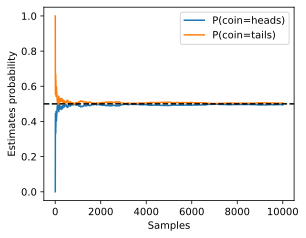

In [14]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimates probability')
d2l.plt.legend();